## Importing the libraries and data

In [1]:
import pandas as pd
import string
import numpy as np
import json
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model


In [3]:
with open('/home/thanos/Desktop/Sustainable_fashion/data/polyvore-dataset/train_no_dup.json') as f:
    data1 = json.load(f)
all_df = pd.DataFrame(data1)

In [4]:
def sum_prices(item_list):
    return sum(item['price'] for item in item_list)

In [5]:
all_df['total_price'] = all_df['items'].apply(sum_prices)


In [6]:
all_df

,name,views,items,image,likes,date,set_url,set_id,desc,total_price
0,Casual,8743,"[{'index': 1, 'name': 'mock neck embroidery su...",http://ak1.polyvoreimg.com/cgi/img-set/cid/214...,394,One month,http://www.polyvore.com/casual/set?id=214181831,214181831,A fashion look from January 2017 by beebeely-l...,640.00
1,Being a Vans shoe model with Luke. Idk about t...,188,"[{'index': 1, 'name': 'nirvana distressed t-sh...",http://ak1.polyvoreimg.com/cgi/img-set/cid/120...,9,Two years,http://www.polyvore.com/being_vans_shoe_model_...,120161271,A fashion look from April 2014 featuring destr...,358.10
2,These Chanel bags is a bad habit .x,562,"[{'index': 1, 'name': 'monki singlet', 'price'...",http://ak1.polyvoreimg.com/cgi/img-set/cid/143...,32,Two years,http://www.polyvore.com/these_chanel_bags_is_b...,143656996,12.19.14,2829.00
3,Avenger/Supernatural prp,2613,"[{'index': 1, 'name': 'tops', 'price': 18.0, '...",http://ak2.polyvoreimg.com/cgi/img-set/cid/186...,88,One year,http://www.polyvore.com/avenger_supernatural_p...,186627934,A fashion look from January 2016 by alyssaclai...,8590.00
4,Boho (39),62,"[{'index': 1, 'name': 'yoins leather sexy v-ne...",http://ak2.polyvoreimg.com/cgi/img-set/cid/206...,3,5 months,http://www.polyvore.com/boho_39/set?id=206969379,206969379,A fashion look from August 2016 by kate-goida ...,680.99
...,...,...,...,...,...,...,...,...,...,...
17311,2.15.17,183,"[{'index': 1, 'name': 'raey deep v-neck silk c...",http://ak1.polyvoreimg.com/cgi/img-set/cid/216...,117,4 days,http://www.polyvore.com/15.17/set?id=216801059,216801059,A fashion look from February 2017 by kianahall...,1456.00
17312,tweed,2428,"[{'index': 1, 'name': 'michael kors printed bo...",http://ak1.polyvoreimg.com/cgi/img-set/cid/190...,382,One year,http://www.polyvore.com/tweed/set?id=190488700,190488700,A fashion look from February 2016 by drigomes ...,4081.00
17313,TV Style: Pretty Little Liars,2184,"[{'index': 1, 'name': 'color block fit flare m...",http://ak2.polyvoreimg.com/cgi/img-set/cid/187...,398,One year,http://www.polyvore.com/tv_style_pretty_little...,187504514,A fashion look from January 2016 by vanjazivad...,440.00
17314,60-Second Style: Work Wear,3147,"[{'index': 1, 'name': 'patchwork fit flare dre...",http://ak2.polyvoreimg.com/cgi/img-set/cid/211...,440,Three months,http://www.polyvore.com/60-second_style_work_w...,211085207,A fashion look from November 2016 by beebeely-...,1745.00


## We try to implement the model that takes as input images from different channels

In [4]:
# Define the shape of your input images (height, width, channels)
input_shape = (16, 16, 3)

In [5]:
# We map here every layer to a specific input
# Create seven input layers
input1 = Input(shape=input_shape, name="Image_Top")
input2 = Input(shape=input_shape, name="Image_Bottom")
input3 = Input(shape=input_shape, name="Image_Shoes")
input4 = Input(shape=input_shape, name="Image_Bags")
input5 = Input(shape=input_shape, name="Image_Accessories")
input6 = Input(shape=input_shape, name="Image_Onepiece")
input7 = Input(shape=input_shape, name="Image_Oterwear")

fc1 = Dense(128, activation='relu')(input1)
fc2 = Dense(128, activation='relu')(input2)
fc3 = Dense(128, activation='relu')(input3)
fc4 = Dense(128, activation='relu')(input4)
fc5 = Dense(128, activation='relu')(input5)
fc6 = Dense(128, activation='relu')(input6)
fc7 = Dense(128, activation='relu')(input7)

# Concatenate all the fully connected layers' outputs
concatenated = Concatenate()([fc1, fc2, fc3, fc4, fc5, fc6, fc7])


# Additional Fully Connected layer on concatenated outputs
fc_final1 = Dense(128, activation='linear')(concatenated)
fc_final2 = Dense(64, activation='relu')(fc_final1)
fc_final3 = Dense(32, activation='relu')(fc_final2)
fc_final4 = Dense(4, activation='relu')(fc_final3)
output = Dense(1,activation='linear')(fc_final4)


In [9]:
model = Model(inputs=[input1,input2, input3, input4, input5, input6, input7], outputs=output)


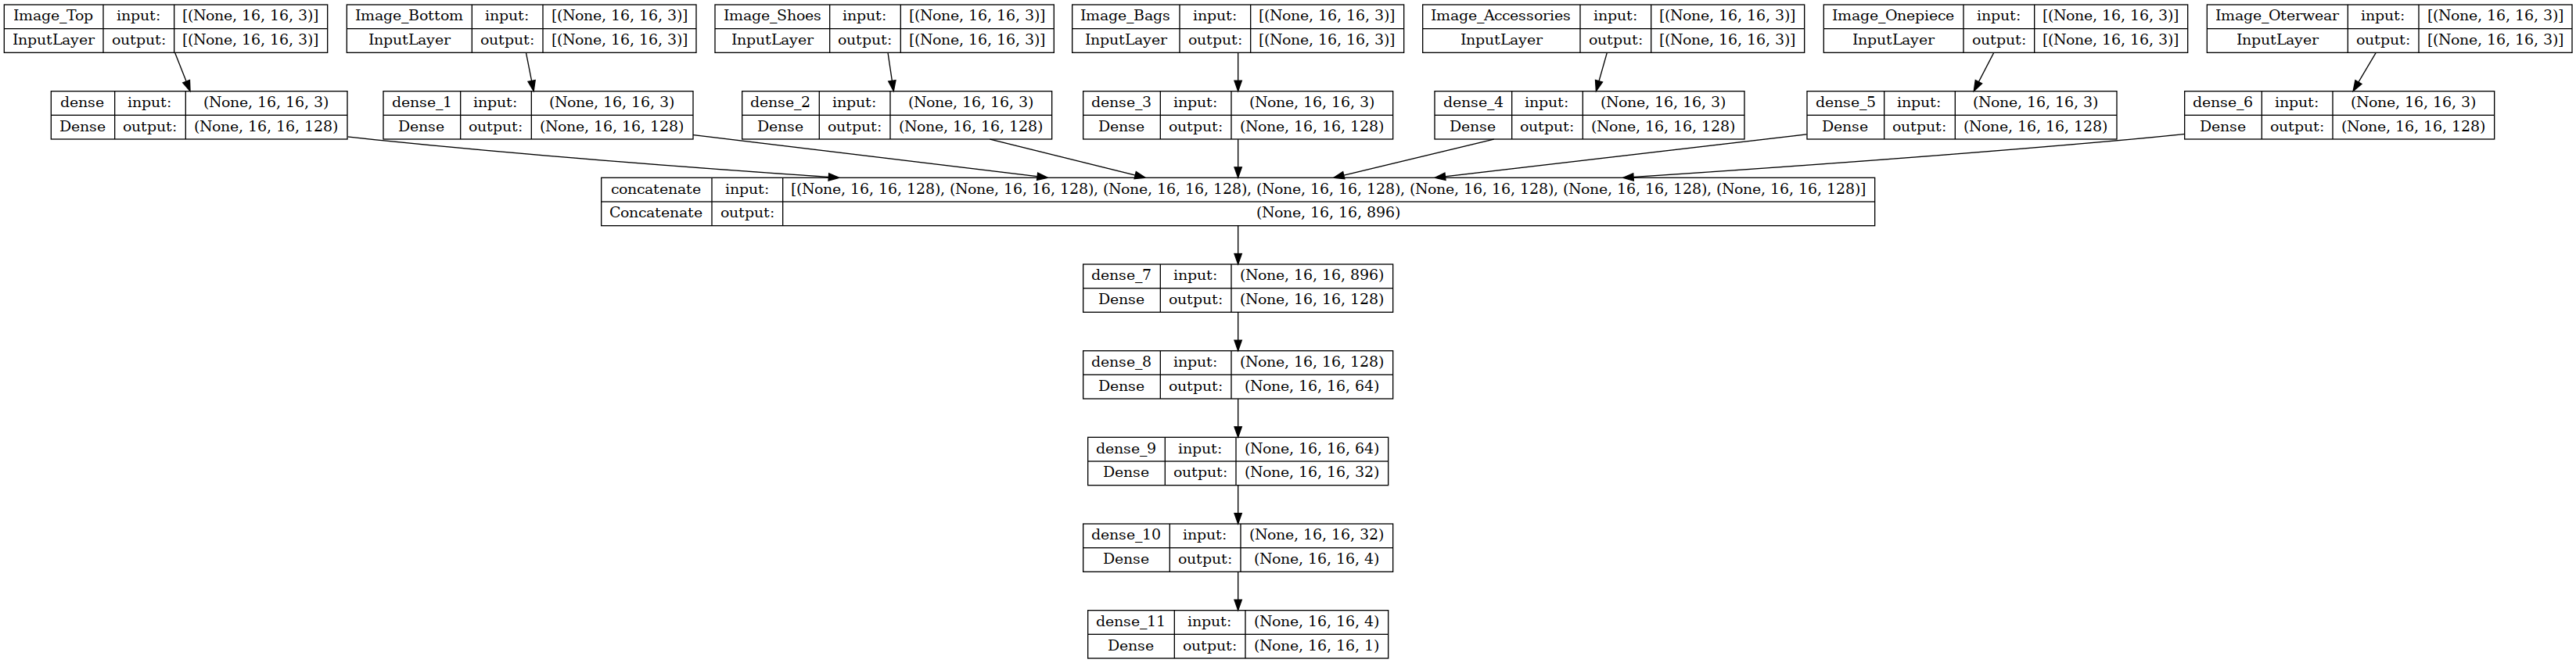

In [10]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)


In [ ]:
# Compile the model 
model.compile(loss='categorical_crossentropy',optimizer='Adam', 
                           metrics=['accuracy'])